In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../models/stylegan2')
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from os.path import join as oj
import pandas as pd
import pickle as pkl
import sklearn.model_selection
import models
import util
import os
import config
import viz
import scipy.stats
from tqdm import tqdm
import figs
import matplotlib.image as mpimg
sys.path.append('transects')
from transects import make_transects, ganwrapper

# look at celeba-hq

0.18353820874593824
0.6469938430377986
0.9860887658247107
0.9999999901068416
0.2058747535026458
0.660261133125997
0.9857338378454609
0.9999999933220884
0.1800607168384758
0.609609777578095
0.9860268379592081
0.9999999916888034
0.20848452987583532
0.6388638181351953
0.9816178666296496
0.9999999938085994
0.17168123383343903
0.6111669413200181
0.9827778027784922
0.999999992128373


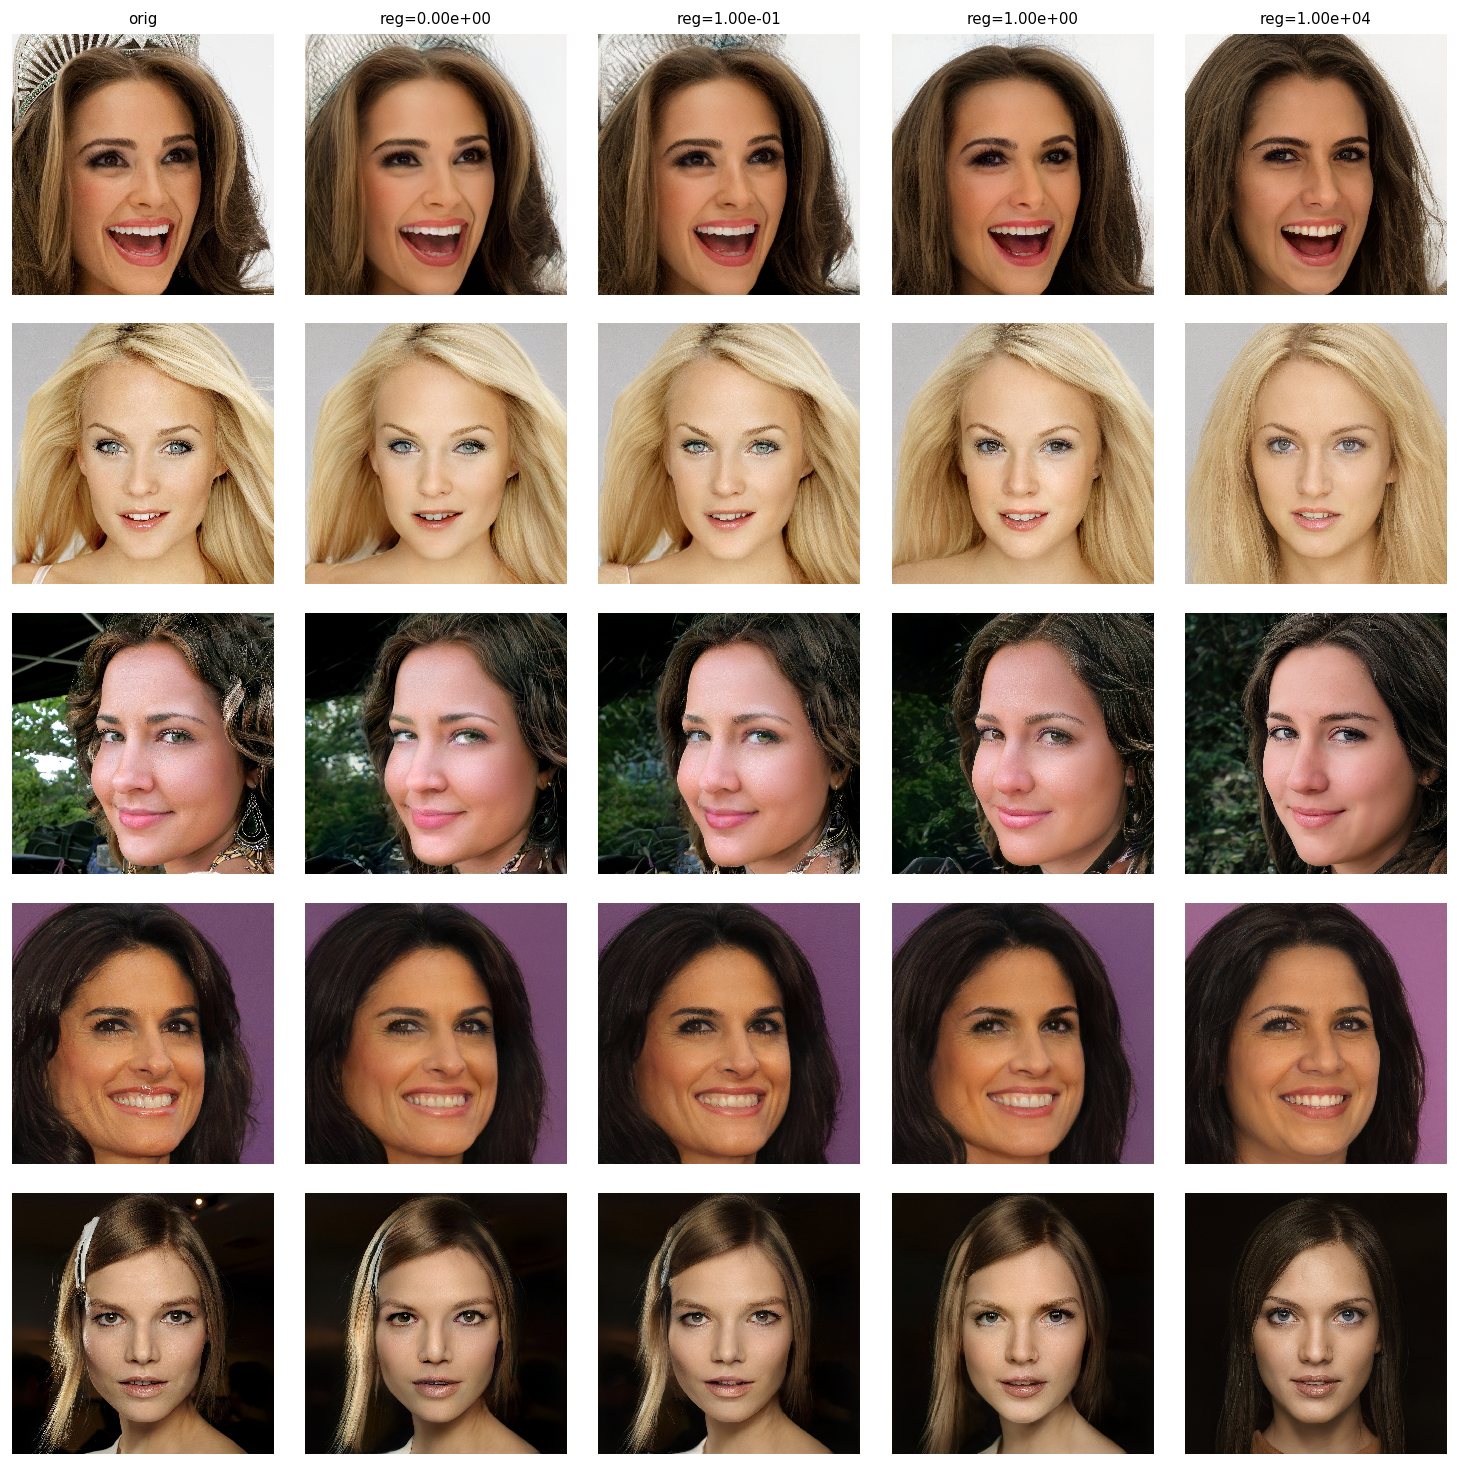

In [51]:
DIR_ORIG = '../data/celeba-hq/ims/'
DIRS_GEN = '../data_processed/celeba-hq/'

regs = [0, 0.1, 1, 10000]
IM_NUMS = np.arange(1, 6)


R, C = len(IM_NUMS), 1 + len(regs)
plt.figure(dpi=120, figsize=(C*2.5, R*2.5))
for r, IM_NUM in enumerate(IM_NUMS):
    ims = []
    latents = []
    im_orig = mpimg.imread(oj(DIR_ORIG, f'{IM_NUM:05}.jpg'))
    for reg in regs:
        folder = f'generated_images_{reg}'
        im_fname = oj(DIRS_GEN, folder, f'{IM_NUM:05}.png')
        ims.append(mpimg.imread(im_fname))
        latents.append(np.load(oj(DIRS_GEN, folder, f'{IM_NUM:05}.npy')))
        print(np.mean(np.abs(np.corrcoef(latents[-1]))))

    
    plt.subplot(R, C, C * r + 1)
    util.imshow(im_orig)
    if r == 0:
        plt.title('orig', fontsize=9)

    for i in range(len(regs)):
        plt.subplot(R, C, C * r + 2 + i)
        util.imshow(ims[i])
        if r == 0:
            plt.title(f'reg={regs[i]:.2e}', fontsize=9)
plt.tight_layout()

# now let's regenerate the images

In [53]:
latents = np.array(latents)
print(latents.shape)

(4, 18, 512)


In [54]:
# G = ganwrapper.GANWrapper(image_size=512)

In [16]:
# make CHG transects
make_transects.make_transects(
                   G,
                   orth=True,
                   save_dir='results/t',
                   model_dir="transects/data/latent-models/",
                   latents=latents)

0 3
W0.shape (1, 18, 512)
1 3
W0.shape (1, 18, 512)
2 3
W0.shape (1, 18, 512)


In [55]:
# make 1D transects
LIMS = {
    'C': [-1.5, 1.7],
    'H': [-0.5, 0.0],
    'G': [-1.75, 1.75],
}
N_IMS = 5
ATTRS = 'CHG'
for attr in ATTRS:
    make_transects.make_transects(
                       G,
                       attr=attr,
                       N_IMS_LIST=[N_IMS],
                       LIMS_LIST=LIMS[attr],
                       orth=True,
                       save_dir='results/t1d',
                       model_dir="transects/data/latent-models/",
                       latents=latents)

0 4
1 4
2 4
3 4
0 4
1 4
2 4
3 4
0 4
1 4
2 4
3 4


**load the results**

  0%|          | 0/5 [00:00<?, ?it/s]

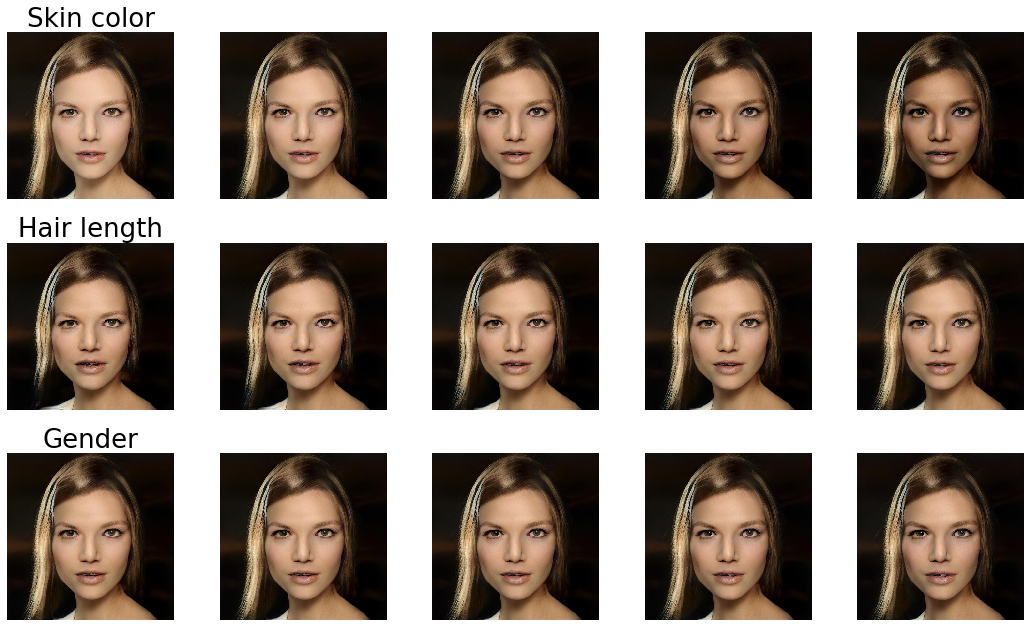

 20%|██        | 1/5 [00:01<00:04,  1.00s/it]

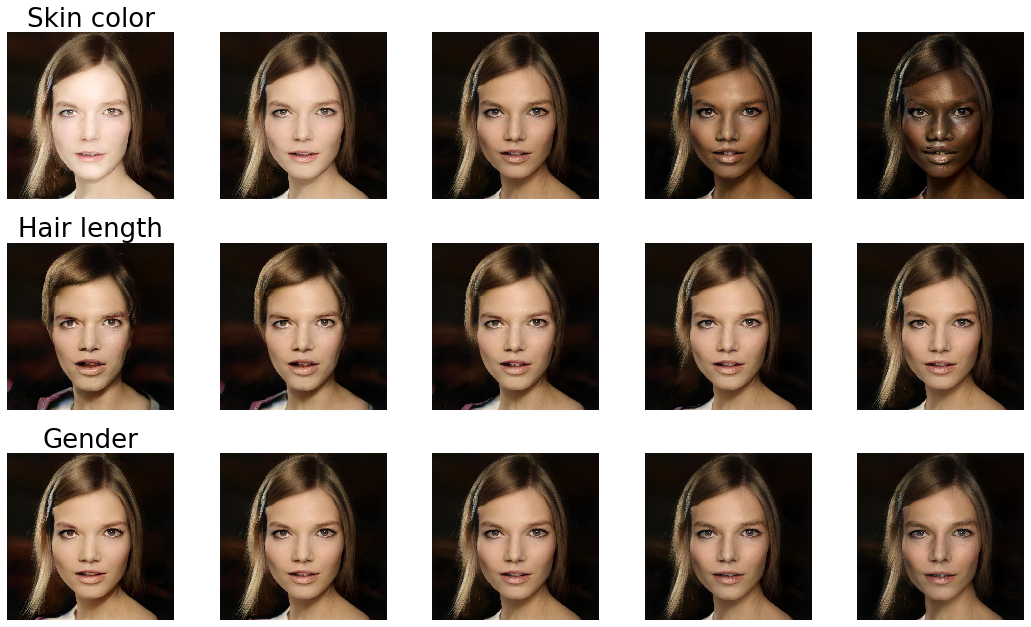

 40%|████      | 2/5 [00:02<00:03,  1.00s/it]

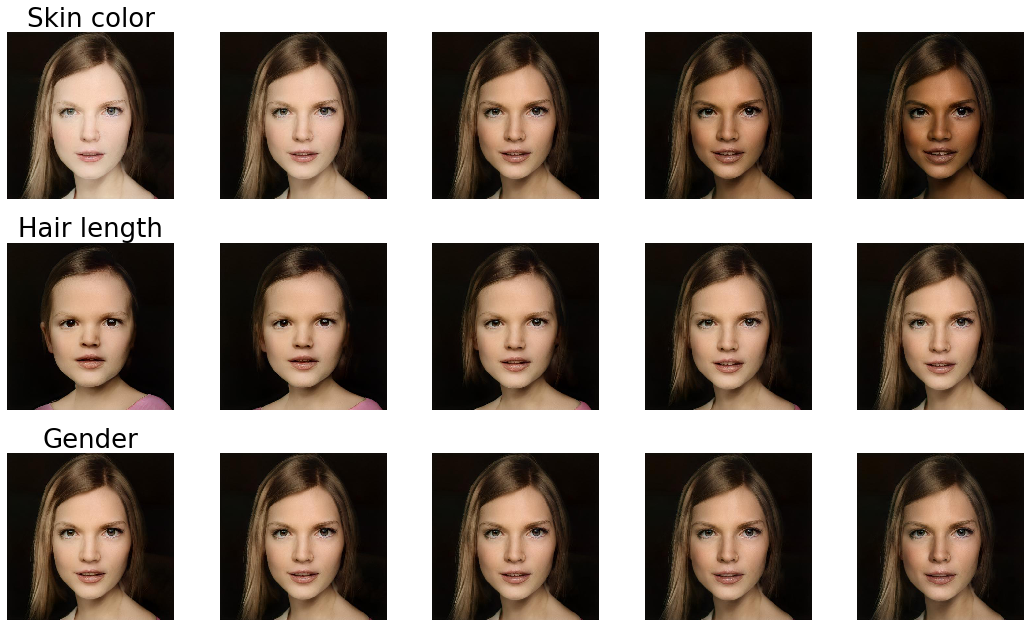

 60%|██████    | 3/5 [00:02<00:01,  1.01it/s]

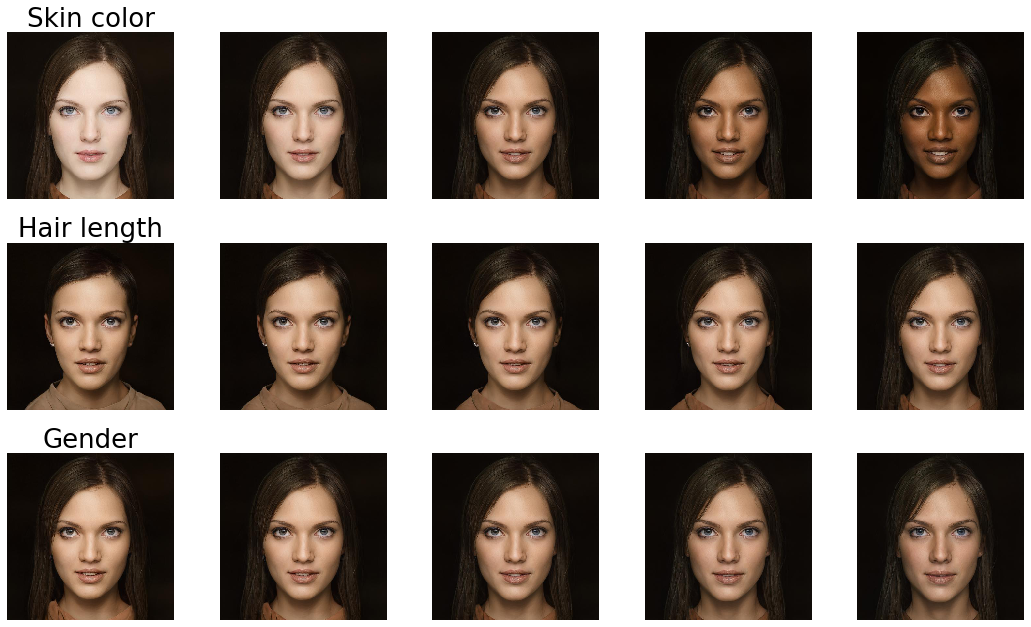

 80%|████████  | 4/5 [00:03<00:00,  1.02it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'results/t1d/ims/0004_C0.jpg'

In [57]:
results_dir = 'results/t1d'
for im_num in tqdm(range(N_IMS)):
    ims = []
    for attr in ATTRS:
        for im_variation_num in range(N_IMS):
            ims.append(mpimg.imread(oj(results_dir, 'ims', f'{im_num:04d}_{attr}{im_variation_num}.jpg')))
    ims = np.array(ims)
    ims = ims.reshape(len(ATTRS), N_IMS, *ims.shape[1:]) 
    util.plot_grid(ims, ylabs=[config.LABELS[a] for a in ATTRS])
    os.makedirs(oj(results_dir, 'out'), exist_ok=True)
    plt.savefig(oj(results_dir, 'out', f'{im_num}.jpg'))
    plt.show()